# Simple neural network for XOR problem

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from tqdm import tqdm

The XOR problem is to find an approximation to the function which classifies points (1,1) , (0,0) as positive examples and (0,1) , (1,0) as negative examples. Below is the plot of classified points where blue indicates positive examples and red indicates negative examples.

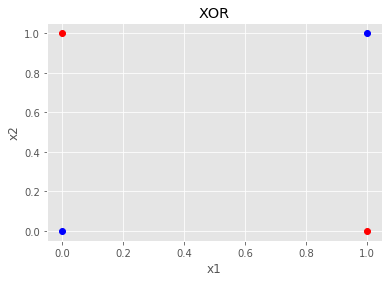

In [2]:
plt.plot([1,0],[1,0],'bo')
plt.plot([1,0],[0,1],'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XOR')
plt.show()

The problem is solved by constructing a neural network with 1 hidden layer using only numpy library. Tqdm library is used to print the progress of for loops.

In [3]:
# initialize
input_n = 2 # number of input neurons
output_n = 1 # number of output neurons
number_hidden = 1 # number of hidden layers
h1_n = 2  # number of neurons in the first hidden layer
h1_w = np.random.random((input_n+1,h1_n)) # generate random weights from input to first hidden layer 
out_w = np.random.random((h1_n+1,output_n)) # generate random weights from first hidden layer to output 
learning_rate = 0.75


# With this construction network is limited to having only 1 hidden layer. However, it can have any number
# of neurons in each layer. Later I am going to modify  it so it can have any number of hidden layers.

In [4]:
# sigmoid acivation function
def activation(x): 
    return 1/(1+np.exp(-x))

In [5]:
# forward propogation
def forwarder(x):
    x = np.append(x,1) # add bias
    h1 = np.dot(x,h1_w) # propogate weights from input to first hidden layer
    h1_active = activation(h1)
    h1_active = np.append(h1_active,1) # add bias
    out = np.dot(h1_active,out_w) # propogate weights from first hidden layer to output layer
    out_active = activation(out)
    return list([h1_active,out_active])


# Forwarder takes input data and returns the activated outputs of hidden layer and output layer.

In [6]:
# backward propogation
def backwarder(x,y):
    fwd = forwarder(x)   
    error = y-fwd[1] # error from target value
    delta_out = error*fwd[1]*(1-fwd[1]) # delta of output neuron
    out_dw = learning_rate*delta_out*fwd[0] # Δw of output neuron
    
    h1_ub = fwd[0]
    delta_h1 = h1_ub*(1-h1_ub)*np.dot(out_w,delta_out) # deltas of hidden layer neurons
    h1_dw = learning_rate*delta_h1[:-1]*np.append(x,1)[:, np.newaxis]  # Δw-s of hidden layer neurons
    return list([out_dw,h1_dw])


# Backwarder takes input data and corresponding target data
# passes it through forwarder and returns the Δw-s of 
# hidden layer neurons and output neuron.

In [7]:
def epoch(x,y):
    out_all_dw  = 0
    h1_all_dw = 0
    for indep,dep in zip(x,y):
        back = backwarder(indep,dep)
        out_all_dw += back[0][:, np.newaxis] # adds Δw-s to output neuron
        h1_all_dw += back[1] # adds Δw-s to hidden layer neurons
    return list([out_all_dw,h1_all_dw])


# Epoch does the forwarding and backpropogation for all 4 points.

In [8]:
def result(x):
    res = []
    for example in x:
        res.append(forwarder(example)[1])
    return res


# Result returns predictions for all 4 points.

In [9]:
# XOR data points
x_train = np.array([[1,1],
                    [0,0],
                    [0,1],
                    [1,0]])
y_train = np.array([[1],
                    [1],
                    [0],
                    [0]])

The next cell is training and printing results of the network. Sometimes the network may get stuck in a local minima. If it happens you can observe that loss gets stuck at around 0.5. This happens due to random weights initializations. Run the notebook from initialization cell again to generate new weights and hopefully get past local minima :).

In [10]:
# pre-training details
loss = 0
print('Pre training:')
for i in range(len(x_train)):
    loss +=(y_train[i]-forwarder(x_train[i])[1] )**2
    print( x_train[i],'  Predict:',result(x_train)[i],'  Target:',y_train[i],'  Error:',y_train[i]-forwarder(x_train[i])[1])
print( 'Loss: ', loss)

# train for 50,000 epochs
for i in tqdm(range(50000)):
    if i%10000==0 and i!=0: # print loss every 10000-th epoch
        loss = 0
        for j in range(len(x_train)):
            loss +=(y_train[j]-forwarder(x_train[j])[1] )**2
        print( 'Loss: ', loss,' for '+str(i)+'-th epoch')
    e = epoch(x_train,y_train)
    out_w += e[0]
    h1_w += e[1]

    
# post_training details    
loss = 0
print( 'Post training:')
for i in range(len(x_train)):
    loss +=(y_train[i]-forwarder(x_train[i])[1] )**2
    print( x_train[i],'  Predict:',result(x_train)[i],'  Target:',y_train[i],'  Error:',y_train[i]-forwarder(x_train[i])[1])
print( 'Loss: ', loss)

Pre training:
[1 1]   Predict: [ 0.76319392]   Target: [1]   Error: [ 0.23680608]
[0 0]   Predict: [ 0.75311825]   Target: [1]   Error: [ 0.24688175]
[0 1]   Predict: [ 0.75977969]   Target: [0]   Error: [-0.75977969]
[1 0]   Predict: [ 0.7585858]   Target: [0]   Error: [-0.7585858]
Loss:  [ 1.26974531]


 20%|██████████████████████████████████████                                                                                                                                                          | 9921/50000 [00:02<00:11, 3512.97it/s]

Loss:  [ 0.0007567]  for 10000-th epoch


 40%|████████████████████████████████████████████████████████████████████████████▏                                                                                                                  | 19937/50000 [00:05<00:08, 3535.39it/s]

Loss:  [ 0.00035258]  for 20000-th epoch


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 29960/50000 [00:08<00:05, 3543.99it/s]

Loss:  [ 0.00022863]  for 30000-th epoch


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 39977/50000 [00:11<00:02, 3543.45it/s]

Loss:  [ 0.00016881]  for 40000-th epoch


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:14<00:00, 3543.68it/s]


Post training:
[1 1]   Predict: [ 0.9943997]   Target: [1]   Error: [ 0.0056003]
[0 0]   Predict: [ 0.99350789]   Target: [1]   Error: [ 0.00649211]
[0 1]   Predict: [ 0.0054828]   Target: [0]   Error: [-0.0054828]
[1 0]   Predict: [ 0.00548459]   Target: [0]   Error: [-0.00548459]
Loss:  [ 0.00013365]
